# Actividad 2 Regresiones

- **Profesor:** Francisco Perez Galarce
- **Ayudante:** Yesenia Salinas

**Integrantes grupo:**
- Jorge Troncoso
- Nicole Villegas
- Exequiel Venegas

## 2.1 Solucion cerrada de regresión lineal

In [34]:
# Se importaran las librerias para todos los ejercicios de la actividad

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import itertools

In [35]:
# Generar datos simulados

# Fijar semilla para reproducibilidad
np.random.seed(3)

# Se genera variable independiente - descriptor
x = np.random.uniform(0, 3, 1000)

# Se genera variable dependiente - objetivo
y = 5 + 2 * x + np.random.uniform(2, 4, 1000)

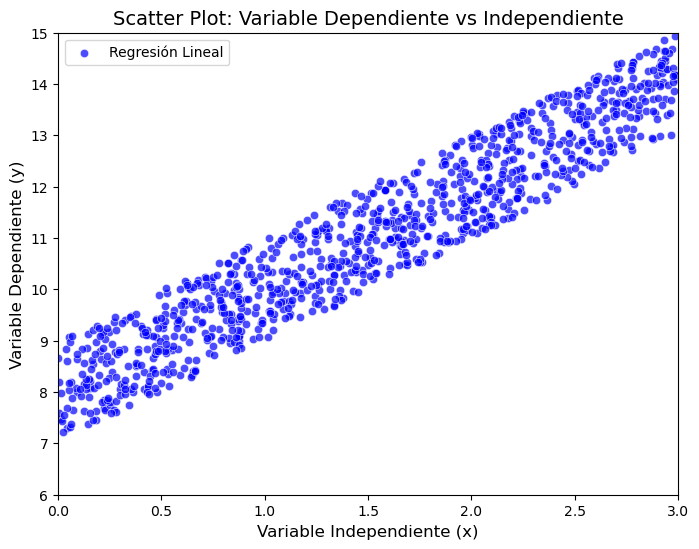

In [36]:
# Gráfico de dispersión

# tamaño de la figura
plt.figure(figsize=(8, 6))
# Generación grafico scatterplot
sns.scatterplot(x=x, y=y, alpha=0.7, color='blue')
# Titulo del gráfico
plt.title('Scatter Plot: Variable Dependiente vs Independiente', fontsize=14)
# Etiquetas para los ejes
plt.xlabel('Variable Independiente (x)', fontsize=12)
plt.ylabel('Variable Dependiente (y)', fontsize=12)
# Tamaños de las fuentes de los ejes
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# Limites de los ejes
plt.axis([0, 3, 6, 15])
# leyenda al gráfico
plt.legend(["Regresión Lineal"])

# Muestra el gráfico completo
plt.show()


Claramente se ve una relación lineal positiva entre la variable independiente y la variable dependiente, por tanto a medida que los valores de la variable x aumenten tambien lo hacen los valores de la variable y, los puntos se distribuyen bastante uniforme a lo largo de la linea de tendencia. Ademas existe una dispersión vertical de los datos.

In [37]:
# Función para gráficar datos simulados, al momento de llamar la función, se pued
def visualizar_datos(x, y, num_datos):
    """
    Parámetros:
        x : Variable independiente.
        y : Variable dependiente.
        num_datos: Número de datos a mostrar (los primeros n datos).
    
    Retorna:
        No retorna nada, solo muestra el gráfico generado.
    """
    # Se valida si num_datos es mayor que el tamaño real de los datos (no puede sobrepasar los 1000)
    if num_datos > len(x) or num_datos > len(y):
        raise ValueError("El número de datos a mostrar excede la cantidad total de datos disponibles.")
    
    # Seleccionar los primeros `num_datos`
    x_muestra = x[:num_datos]
    y_muestra = y[:num_datos]
    
    # Gráfico de dispersión
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=x_muestra, y=y_muestra, alpha=0.7, color='blue')
    plt.title('Scatter Plot: Variable Dependiente vs Independiente', fontsize=14)
    plt.xlabel('Variable Independiente (x)', fontsize=12)
    plt.ylabel('Variable Dependiente (y)', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.axis([0, 3, 6, 15])  # Ajustar los límites según el rango esperado
    plt.legend(["Regresión Lineal"])
    plt.show()

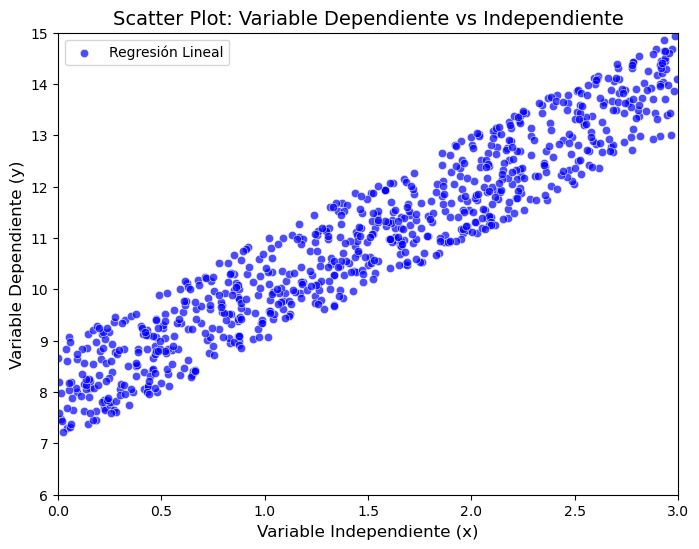

In [38]:
# Se llama a la función para visualizar los datos
visualizar_datos(x,y,800)

Aunque en este gráfico se puedan tomar muestras de la cantidad total de datos, mantiene el mismo comportamiento que el gráfico anterior.

In [39]:
# Funcion para calcular los parametros B de una regresión lineal (B0 Intercepto corta el eje y) y (B1 la pendiente asociado a x)
def solucion_cerrada(x, y):
    """
    Calcula los parámetros óptimos para la regresión lineal usando la solución cerrada.

    Args:
        x: Variable independiente.
        y: Variable dependiente.

    Returns:
        beta: arreglo con los parámetros optimizados intercepto y pendiente
    """
    # Se construye la matriz X, en la primera columna solo habra 1 y en la segunda columna iran los valores de x
    # Matriz de diseño con el intercepto
    X = np.vstack([np.ones_like(x), x]).T

    # Aplicación de la solución cerrada: (X^T * X)^-1 * X^T * y
    # Se transpone X, es decir cambias filas por columnas, luego se hace una multiplicacion matricial por la matriz X
    # con np.linalg.inv se calcula la inversa de la matriz X^T * X
    # luego multiplica por la matriz transpuesta y luego por y
    beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    
    # Retorno un arreglo con los parametroz B0 Y B1 
    return beta

In [40]:
# Se llama a la funcion para calcular parámetros óptimos
beta_optimos = solucion_cerrada(x, y)

# Imprimir los resultados
print(f'Parámetros optimizados: el intercepto es: {beta_optimos[0]:.2f}, Pendiente = {beta_optimos[1]:.2f}')

Parámetros optimizados: el intercepto es: 7.92, Pendiente = 2.05


In [41]:
# Funcion que crea gráfico pero con los parametros optimos
def plot_regression_line(x, y, beta):
    """
    Grafica la regresión ajustada sobre los datos.

    Args:
        x (array-like): Variable independiente.
        y (array-like): Variable dependiente.
        beta (array-like): Parámetros de la regresión [intercepto, pendiente].
    """
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=x, y=y, alpha=0.7, color='blue', label='Datos simulados')
    plt.plot(x, beta[0] + beta[1] * x, color='red', label='Línea ajustada')
    plt.title('Regresión Lineal Ajustada', fontsize=14)
    plt.xlabel('Variable Independiente (x)', fontsize=12)
    plt.ylabel('Variable Dependiente (y)', fontsize=12)
    plt.legend()
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

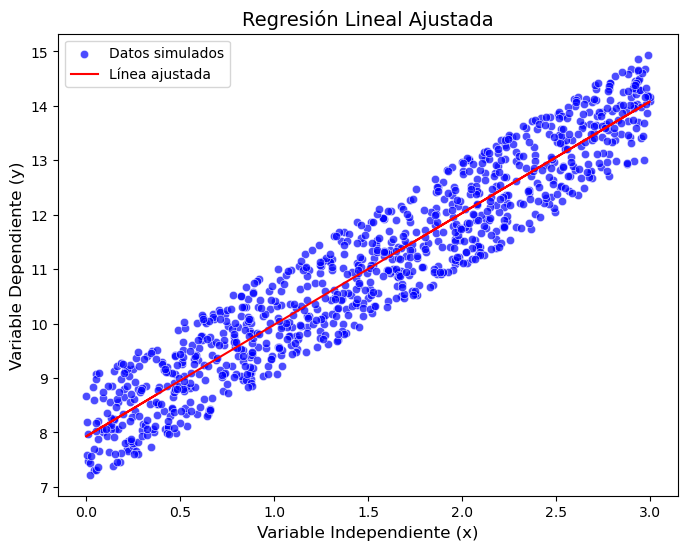

In [42]:
plot_regression_line(x, y, beta_optimos)

El ajuste optimo obtenido de la solucion cerrada se ajusta muy bien con la tendencia central de los datos, a pesar de existir cierta variabilidad en los datos estos no afectan significativamente la capacidad de ajustarse a la tendencia central. Visualmente la linea atraviesa el centro del conjunto de puntos lo que refleja que se captura de buena manera la relación principal entre las variables.

In [43]:
# Se define la clase RegressionLineal y metodos asociados
class RegressionLineal:
    def __init__(self, data_type='simulado', dataset_size=1000):
        self.data_type = data_type
        self.dataset_size = dataset_size
        self.coef_ = None

    def simulate_data(self):
        self.x = np.random.uniform(0, 3, self.dataset_size)
        noise = np.random.uniform(2, 4, self.dataset_size)
        self.y = 5 + 2 * self.x + noise
        return self.x, self.y

    def fit(self, x, y):
        X = np.vstack([np.ones_like(x), x]).T
        self.coef_ = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        return self.coef_

    def visualize_data(self, x, y, save=False):
        scatter_plot(x, y, save)

    def plot_regression(self, x, y, save=False):
        if self.beta is None:
            raise ValueError("El modelo no ha sido ajustado aún.")
        plot_regression_line(x, y, self.beta, save)

    def predict(self, x):
        if self.coef_ is None:
            raise ValueError("Modelo no ajustado. Llama al método 'fit' primero.")
        X = np.vstack([np.ones_like(x), x]).T
        return X @ self.coef_

    def plot(self, x, y):
        if self.coef_ is None:
            raise ValueError("Modelo no ajustado. Llama al método 'fit' primero.")
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=x, y=y, alpha=0.7, label='Datos')
        plt.plot(x, self.predict(x), color='red', label='Línea Ajustada')
        plt.title(f'Regresión Lineal ({self.data_type.capitalize()})', fontsize=14)
        plt.xlabel('Variable Independiente (x)', fontsize=12)
        plt.ylabel('Variable Dependiente (y)', fontsize=12)
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.show()

## 2.2 Regresión polinomial

In [44]:
# Se cargan los datos
# tanto los registros vacios ('') como los registros que contienen solo un espacio (' ') se interpretarán como valores faltantes.
df = pd.read_csv('measurements.csv', sep=',', na_values=['', ' '])

In [45]:
# Se obtiene información basica del dataframe generado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [46]:
df.head(50)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
5,"8,3","6,4",50,"21,5",10,NaN,E10,0,0,0,NaN,NaN
6,"7,8","4,4",43,"21,5",11,NaN,E10,0,0,0,NaN,NaN
7,"12,3",5,40,"21,5",6,NaN,E10,0,0,0,NaN,NaN
8,"4,9","6,4",26,"21,5",4,NaN,E10,0,0,0,NaN,NaN
9,"11,9","5,3",30,"21,5",9,NaN,E10,0,0,0,NaN,NaN


Con esto se ve que hay columnas con problemas como la columna distance que es tipo object pero claramente trae numeros, primero se hara un preprocesamiento para poder trabajar este dataframe como corresponde

In [47]:
df["distance"].unique()

array(['28', '12', '11,2', '12,9', '18,5', '8,3', '7,8', '12,3', '4,9',
       '11,9', '12,4', '11,8', '24,7', '17,3', '33,4', '25,9', '25,3',
       '14,2', '17,9', '18,4', '18,3', '32,6', '19', '12,1', '20', '4,5',
       '11,7', '10,2', '5,4', '2', '16', '27,3', '10,6', '11,6', '13,1',
       '6,1', '153,5', '2,9', '2,1', '9,8', '6,8', '14', '13,9', '9,7',
       '24,8', '34,8', '5,2', '10,5', '13,2', '13', '12,2', '12,5',
       '15,7', '6,4', '5,3', '26,2', '18,8', '22,9', '162,7', '16,6',
       '15,9', '5,1', '22,4', '31,1', '16,1', '4,2', '17,4', '23,5', '7',
       '20,1', '20,8', '1,7', '35,9', '36,9', '16,8', '9,9', '36,6',
       '44,9', '21,6', '39,4', '26,6', '53,2', '18,9', '43,5', '16,4',
       '21,1', '22,7', '44,4', '35,8', '40,6', '14,1', '58,7', '16,2',
       '31,8', '51,6', '38,6', '81,2', '130,3', '67,2', '43,7', '56,1',
       '39', '38,5', '28,2', '19,6', '22,2', '13,6', '12,6', '8,7', '7,9',
       '2,4', '18,1', '1,3', '13,4', '12,8', '29', '31,4', '27,1', '

In [48]:
df["consume"].unique()

array(['5', '4,2', '5,5', '3,9', '4,5', '6,4', '4,4', '5,3', '5,6', '4,6',
       '5,9', '5,1', '4,7', '4,9', '5,7', '4,1', '5,8', '4,8', '4,3',
       '5,2', '7,4', '6,5', '4', '3,3', '9,9', '6,1', '6,2', '7,9',
       '12,2', '5,4', '3,6', '6,9', '8,7', '6,3', '6', '10,8', '8,1',
       '7,1', '3,8', '9', '3,7', '11,5', '6,6'], dtype=object)

In [49]:
df["temp_inside"].unique()

array(['21,5', '22,5', '20', nan, '21', '20,5', '23', '23,5', '25', '24',
       '22', '19', '24,5', '25,5'], dtype=object)

In [50]:
df["refill liters"].unique()

array(['45', nan, '37,6', '37,7', '38', '38,3', '10', '39', '41', '37',
       '37,2'], dtype=object)

Estas 4 columnas son tipo object pero debieser ser de tipo float ya que contienen numeros con decimales, pero que estan como texto al tener las doble comillas, ademas los decimales estan con , y deberian estar con .

In [51]:
# Identificar columnas que deben ser convertidas a numéricas
#columns_to_convert = ['distance', 'consume', 'speed', 'temp_inside', 'temp_outside', 'refill liters']

columns_a_convertir = ['distance', 'consume', 'temp_inside', 'refill liters']

# Reemplazar comas decimales por puntos y convertir a numérico
for col in columns_a_convertir:
    # Convertir a string, reemplazar comas por puntos, y luego usar pd.to_numeric
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(",", ".", regex=True), errors='coerce')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     float64
 11  refill gas     13 non-null     object 
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


In [53]:
df.head(50)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN
5,8.3,6.4,50,21.5,10,NaN,E10,0,0,0,NaN,NaN
6,7.8,4.4,43,21.5,11,NaN,E10,0,0,0,NaN,NaN
7,12.3,5.0,40,21.5,6,NaN,E10,0,0,0,NaN,NaN
8,4.9,6.4,26,21.5,4,NaN,E10,0,0,0,NaN,NaN
9,11.9,5.3,30,21.5,9,NaN,E10,0,0,0,NaN,NaN


In [54]:
# Visualizar valores nulos
print("Valores nulos antes de la limpieza:")
print(df.isnull().sum())

Valores nulos antes de la limpieza:
distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64


In [55]:
# Visualizar valores nulos
print("Valores nulos antes de la limpieza:")
print(df.isna().sum())

Valores nulos antes de la limpieza:
distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64


Las columnas refill liters y refill gas tienen mas del 95% con datos nulos, por ende lo mejor es eliminarlas, la columna temp_inside es numerica y tiene pocos valores nulos por ende se les rellenara con la media, y la columna speciales se reemplazaran los nulos con un valor None para que sea mas representativo el registro faltante.

In [56]:
# Se eliminan las columnas de refill
df.drop(['refill liters', 'refill gas'], axis=1, inplace=True)

In [57]:
# Se reemplazan registros faltantes con la media en la columna temp_inside
if df['temp_inside'].isnull().any():
    df['temp_inside'].fillna(df['temp_inside'].mean(), inplace=True)

In [58]:
# Se rellenan valores categóricos con un valor representativo (None) en la columna speciales
df['specials'].fillna('None', inplace=True)

In [59]:
# Se verifica la limpieza
print("\nValores nulos después de la limpieza:")
print(df.isnull().sum())


Valores nulos después de la limpieza:
distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
specials        0
gas_type        0
AC              0
rain            0
sun             0
dtype: int64


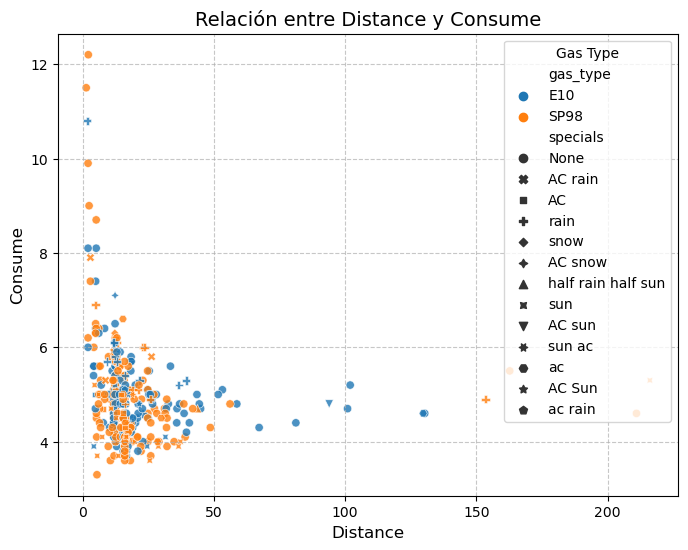

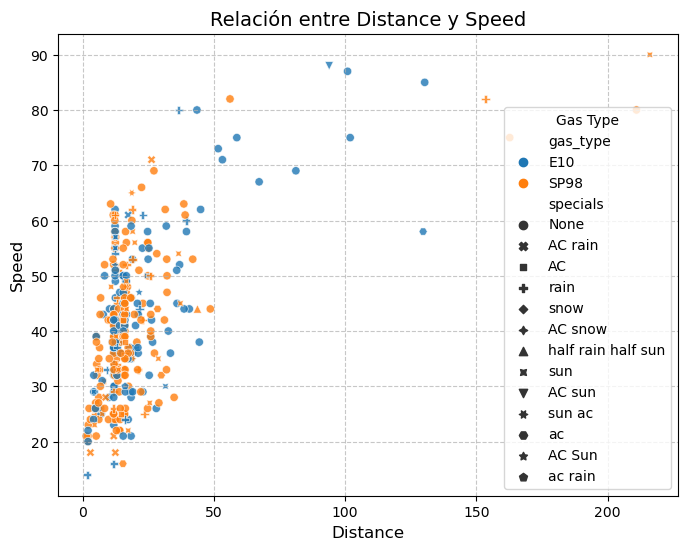

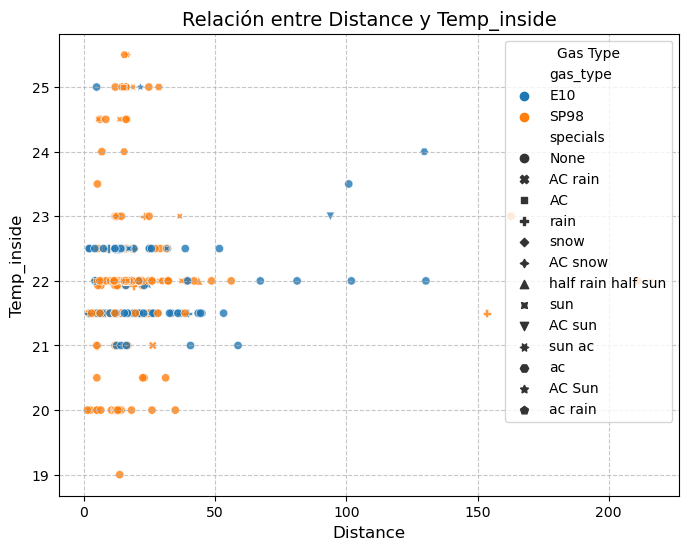

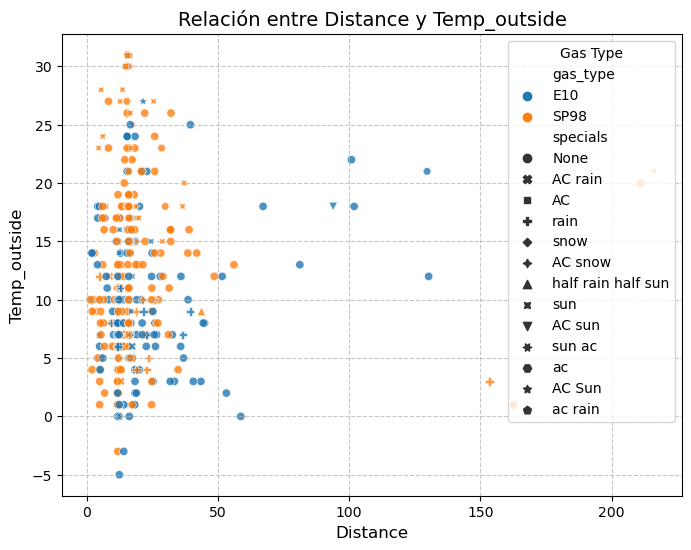

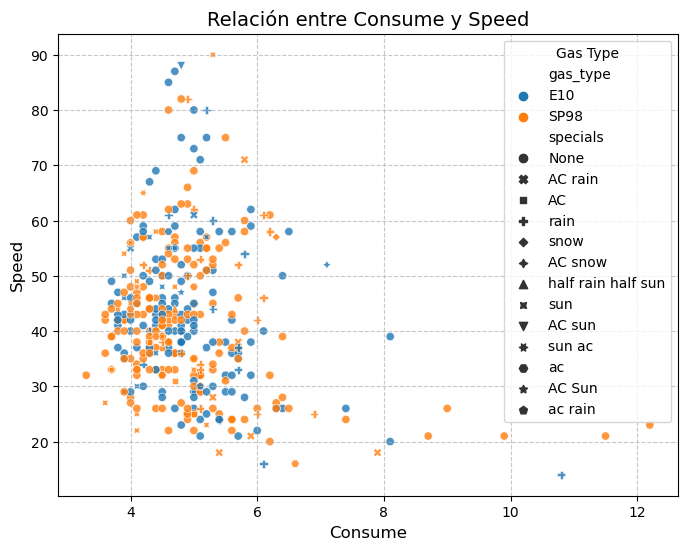

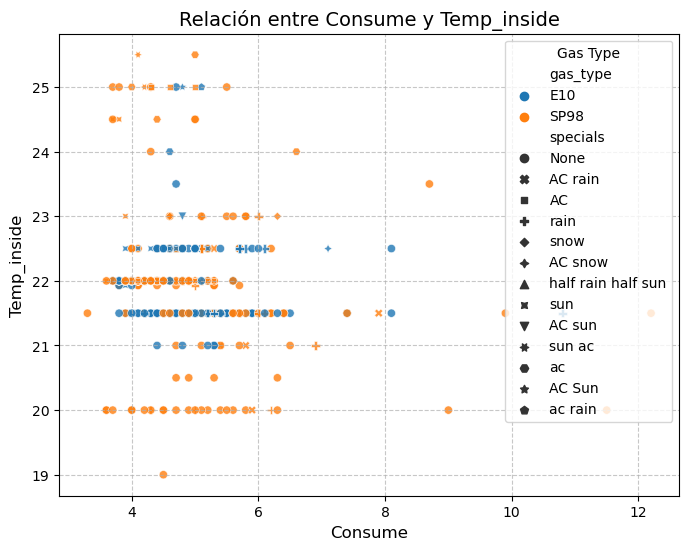

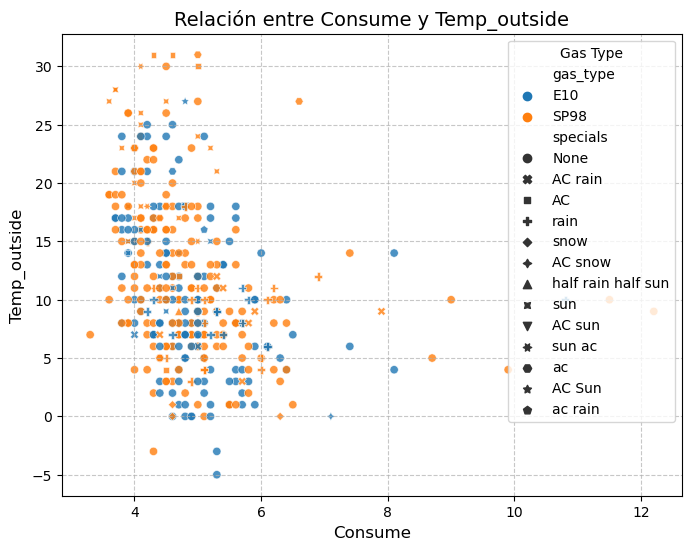

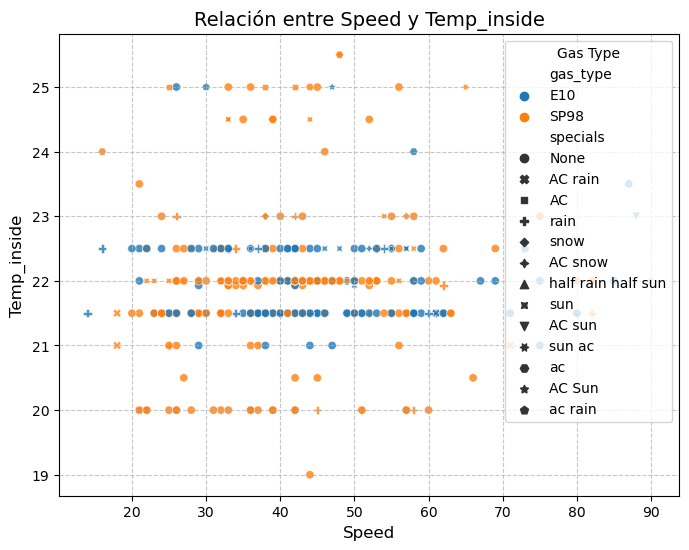

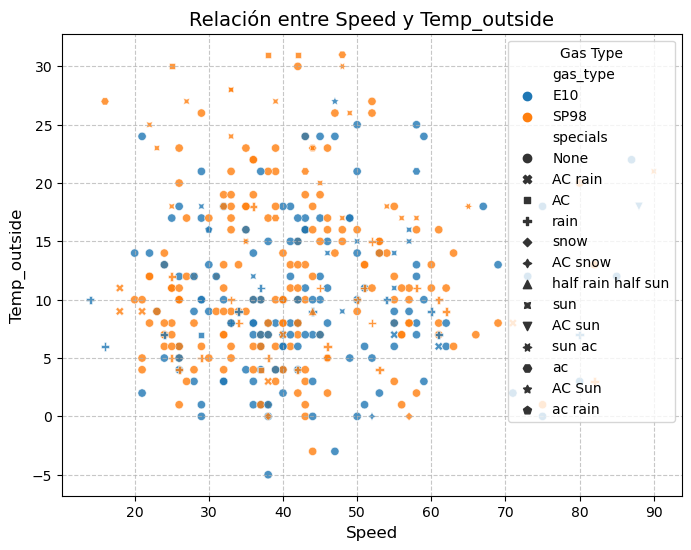

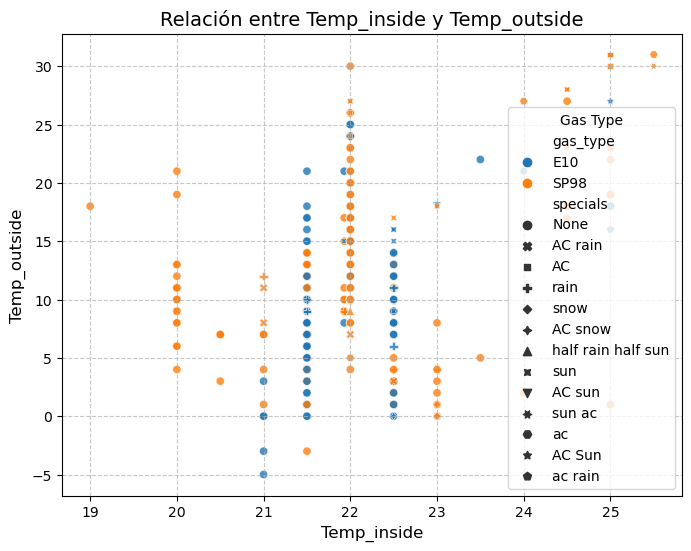

In [60]:
# Filtrar columnas numéricas
numeric_columns = ['distance', 'consume', 'speed', 'temp_inside', 'temp_outside']

# Crear combinaciones de columnas para los scatter plots
combinations = itertools.combinations(numeric_columns, 2)

# Generar un scatter plot para cada combinación de columnas
for x_col, y_col in combinations:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=x_col, y=y_col, hue='gas_type', style='specials', alpha=0.8)
    plt.title(f'Relación entre {x_col.capitalize()} y {y_col.capitalize()}', fontsize=14)
    plt.xlabel(x_col.capitalize(), fontsize=12)
    plt.ylabel(y_col.capitalize(), fontsize=12)
    plt.legend(title='Gas Type', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

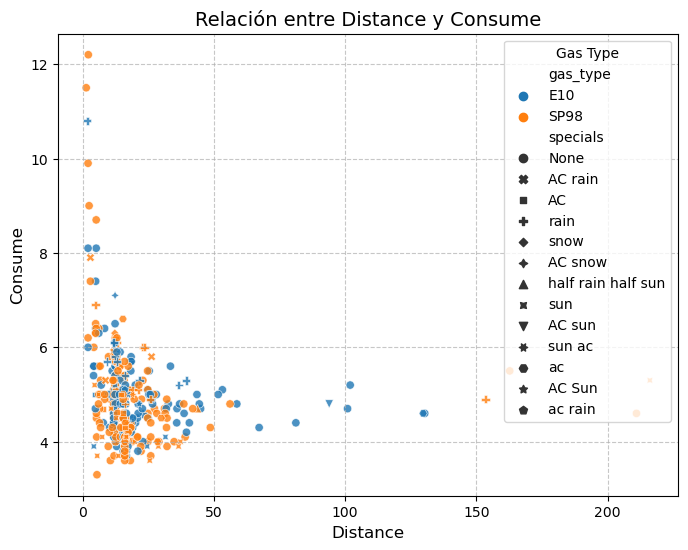

In [61]:
# Muestro solo el gráfico de distancia y consume para análisis
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='distance', y='consume', hue='gas_type', style='specials', alpha=0.8)
plt.title('Relación entre Distance y Consume', fontsize=14)
plt.xlabel('Distance', fontsize=12)
plt.ylabel('Consume', fontsize=12)
plt.legend(title='Gas Type', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Si bien se realizaron gráficos entre todas las variables numericas con graficos de dispersión, concentraremos el análisis solo en el de distancia y y consumo ya que estas 2 variables seran usadas posteriormente. Dicho esto a medida que aumenta la variable distance la variable consume tiende a disminuir ligeramente, para distancias mayores de 50 km hay mayor dispersión en los datos y el consumo parece estabilizarse en valores bajos. Se visualizan valores outliers (atipicos) en distancias matyores a 130 km.

Parámetros ajustados: Intercepto = 5.03, Pendiente = -0.01


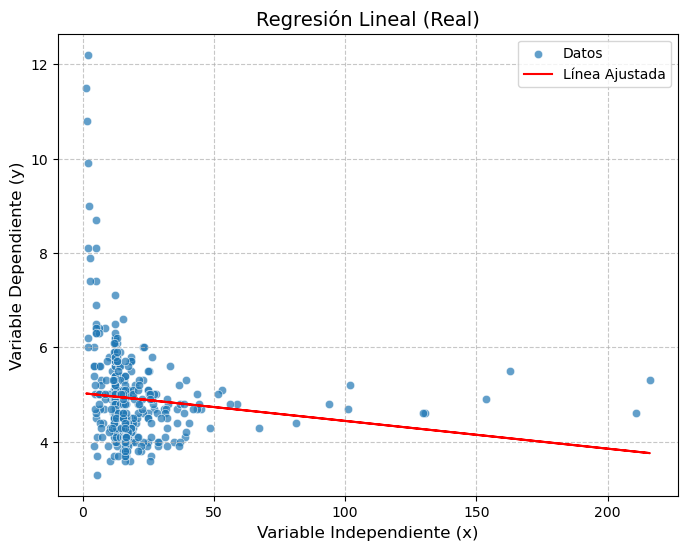

In [62]:
# Convierto las columnas distance y consume en arreglos y los almaceno en las variables x_real e y_real
# genero una instancia de la clase RegressionLineal y la asigno a la variable reg_model
# llamo al metodo fit de la clase y ajusto el modelo a los datos (aplico la solucion cerrada)
#
x_real = df['distance'].values
y_real = df['consume'].values
reg_model = RegressionLineal(data_type='real', dataset_size=len(df))
beta_real = reg_model.fit(x_real, y_real)
print(f'Parámetros ajustados: Intercepto = {beta_real[0]:.2f}, Pendiente = {beta_real[1]:.2f}')
reg_model.plot(x_real, y_real)

Los datos se encuentran muy concentrados, la mayoría de los puntos están concentrados en valores bajos de la variable distance (entre 0 y 50). Esto muestra que los vehículos registrados recorrieron distancias relativamente cortas en la mayoría de los casos. Existe poca dispersion Para distancias mayores a 50, hay muy pocos puntos de datos, y para valores superiores a 150 la cantidad de datos es casi nula.

La línea ajustada tiene una pendiente muy cercana a cero y ligeramente negativa. Esto implica que, en promedio, el consumo (consume) tiende a disminuir de forma casi insignificante a medida que la distancia (distance) aumenta. cuando la distancia recorrida (distance) es igual a 0, el consumo esperado (consume) es aproximadamente 5.03 unidades

La pendiente tan cercana a cero sugiere que no hay una relación fuerte entre estas variables Dado que la mayoría de los puntos están concentrados en valores bajos de distance, el modelo tiene sesgo al ser demasiado simple para capturar la verdadera relación ya que los datos están desbalanceados con muchos puntos en distancias bajas.

Degree 1 MSE (Train): 1.0845, MSE (Test): 0.8996


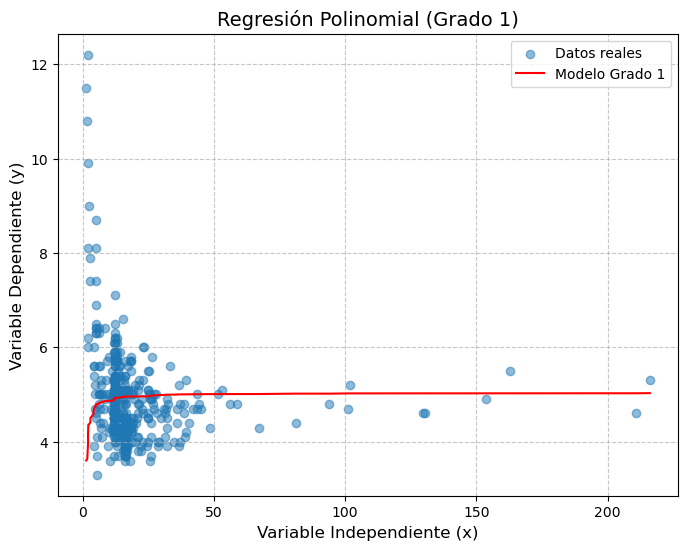

Degree 3 MSE (Train): 0.9159, MSE (Test): 0.7941


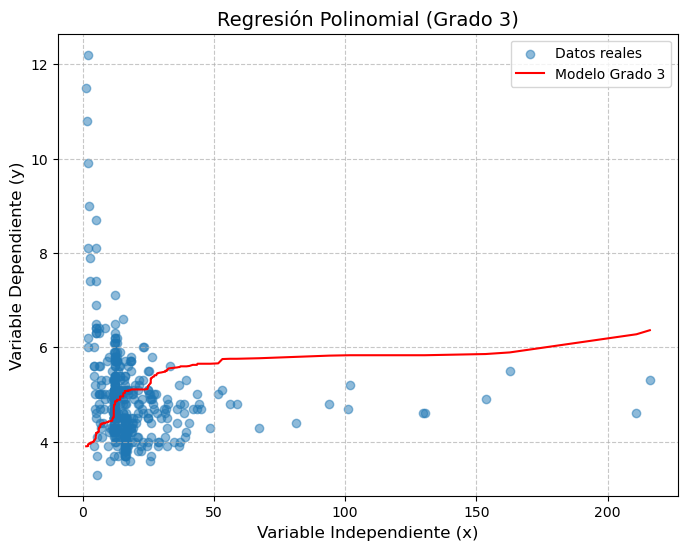

Degree 6 MSE (Train): 0.7084, MSE (Test): 0.7132


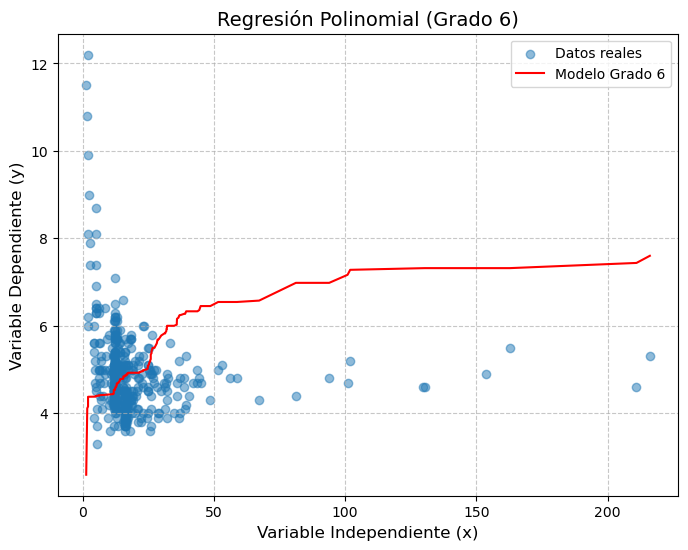

Degree 9 MSE (Train): 0.5939, MSE (Test): 2034.7728


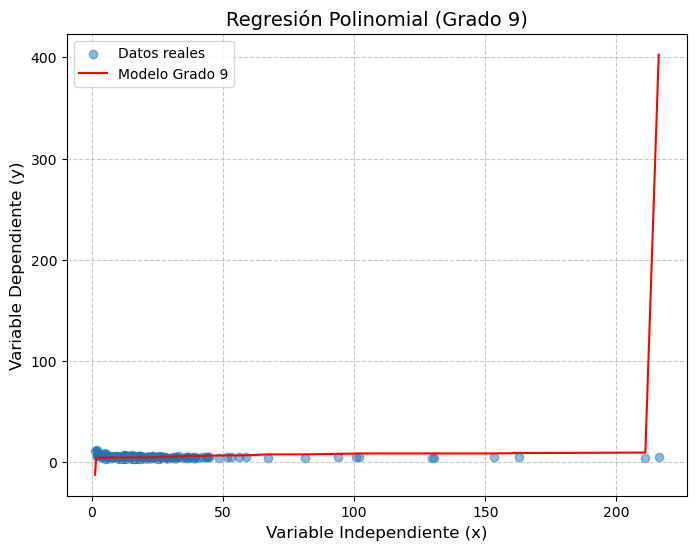

Degree 12 MSE (Train): 6.3234, MSE (Test): 414642.1682


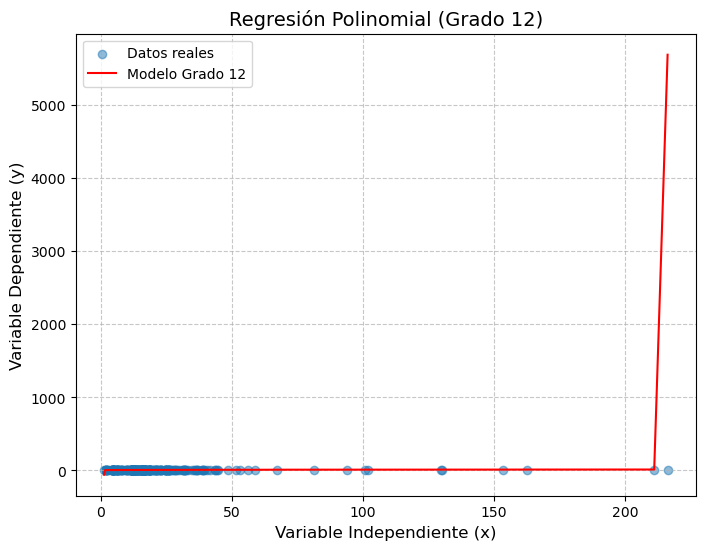

Degree 15 MSE (Train): 57.9795, MSE (Test): 2247067.7225


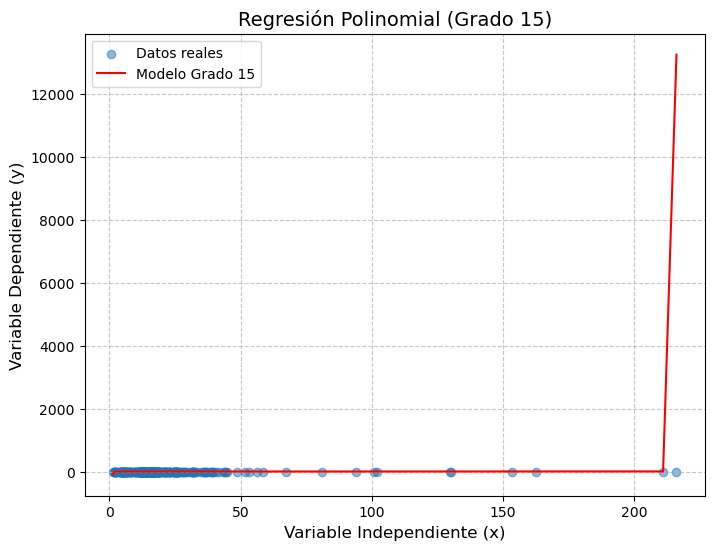

In [63]:
# Regresión Polinomial con los grados ajustados

# Lista con los grados para las regresiones polinomiales
degrees = [1, 3, 6 , 9, 12, 15]

# Se decclara un for para iterar sobre cada grado de la lista
for degree in degrees:
    
    # Se realiza la transformacion polinomial para la varible independiente
    poly = PolynomialFeatures(degree=degree)
    # convierte la variable en un conjunto de caracteristicas polinomiales  y la reorganiza en una matriz de 1 columna
    x_poly = poly.fit_transform(x_real.reshape(-1, 1))
    # se divide los datos en cojuntos de entrenamiento y test
    x_train, x_test, y_train, y_test = train_test_split(x_poly, y_real, test_size=0.2, random_state=42)

    # Se calculan los parametros optimos (solucion cerrada)
    beta_optimos = np.linalg.inv(np.dot(x_train.T, x_train)).dot(np.dot(x_train.T, y_train))
    # Se realizan las predicciones en los conjuntos de entrenamiento y prueba
    y_pred_train = np.dot(x_train, beta_optimos)
    y_pred_test = np.dot(x_test, beta_optimos)

    # Se Calcula el error cuadrático medio (MSE) entre los valores reales y las prediccione
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    print(f"Degree {degree} MSE (Train): {mse_train:.4f}, MSE (Test): {mse_test:.4f}")
    
    #Graficar los datos y el modelo ajustado
    plt.figure(figsize=(8, 6))
    plt.scatter(x_real, y_real, alpha=0.5, label='Datos reales')
    plt.plot(
        np.sort(x_real), 
        np.sort(np.dot(poly.fit_transform(x_real.reshape(-1, 1)), beta_optimos)), 
        label=f'Modelo Grado {degree}', 
        color='red'
    )
    plt.title(f'Regresión Polinomial (Grado {degree})', fontsize=14)
    plt.xlabel('Variable Independiente (x)', fontsize=12)
    plt.ylabel('Variable Dependiente (y)', fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

El error cuadratico medio sirve para evaluar la capacidad del modelo para generalizar, dicho esto se observa que en los grados mas bajos (1,3,6) las predicciones se ajustan de manera razonable a los datos,La línea ajustada captura la tendencia general de los datos sin sobreajustarse y el MSE tanto en el conjunto de entrenamiento como en el de prueba es bajo y relativamente estable.

en los grados mas altos (9,12,15) se observa que ya en el grado 9 las predicciones comienzan a ajustarse mas a los datos, lo que ya comienza a indicar sobreajuste, el cual ya es mas alto en los grados 12 y 15, el MSE en estos grados en el test aumenta demasiado debido al sobreajuste y ya deja de ser generalizable.

Por ende los mejores grados para que el modelo sea mas generalizable son del 1 al 6.

## 2.3 Regresion con Penalizacion

C:\Users\jorge\Anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.29503e-31): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\jorge\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.273e+02, tolerance: 3.423e-02
  model = cd_fast.enet_coordinate_descent(


Alpha: 0.01
  Ridge MSE: 0.7132
  Lasso MSE: 0.7216


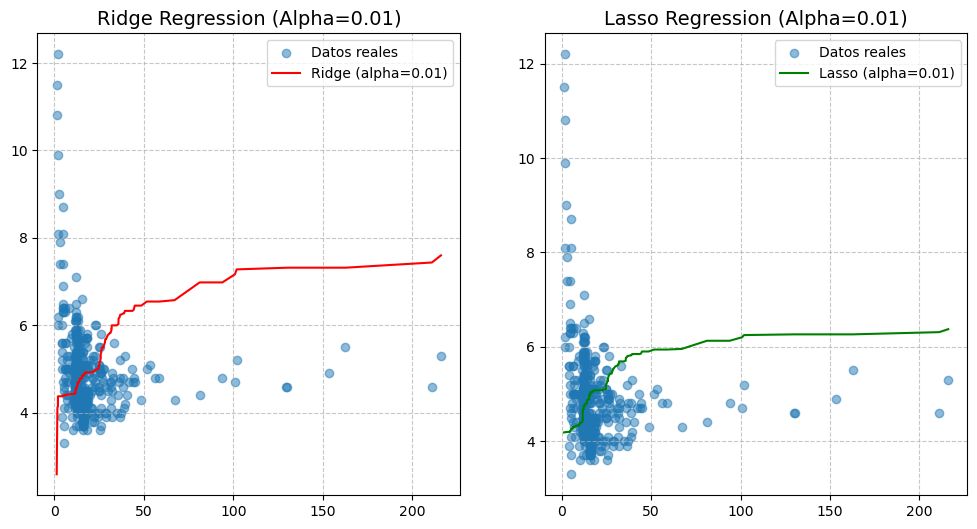

C:\Users\jorge\Anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.29503e-30): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\jorge\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.330e+02, tolerance: 3.423e-02
  model = cd_fast.enet_coordinate_descent(


Alpha: 0.1
  Ridge MSE: 0.7131
  Lasso MSE: 0.7234


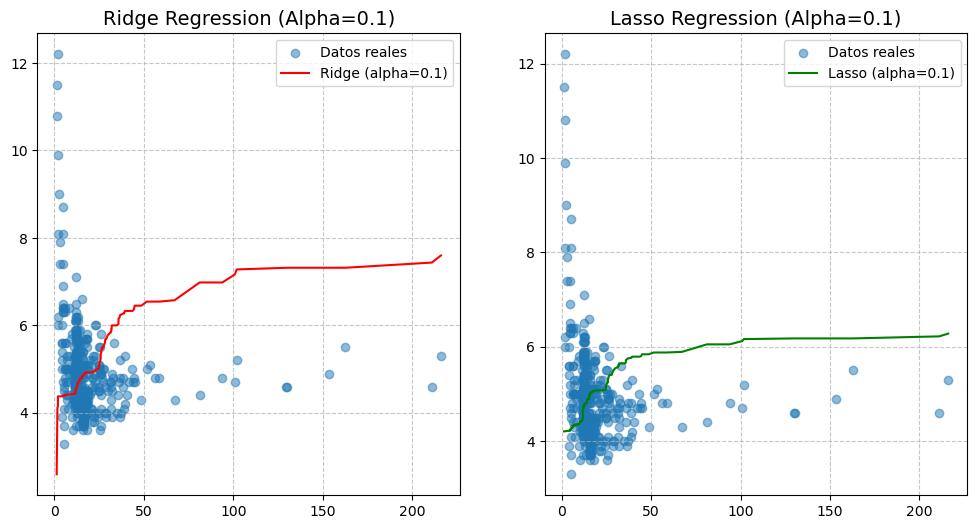

C:\Users\jorge\Anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.29503e-29): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\jorge\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.610e+02, tolerance: 3.423e-02
  model = cd_fast.enet_coordinate_descent(


Alpha: 1
  Ridge MSE: 0.7119
  Lasso MSE: 0.8135


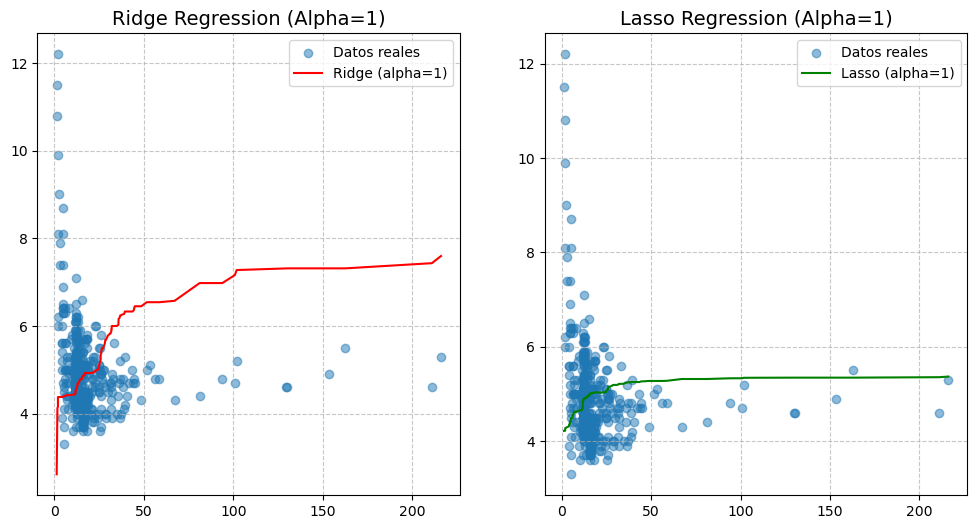

C:\Users\jorge\Anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.29503e-28): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\jorge\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.639e+02, tolerance: 3.423e-02
  model = cd_fast.enet_coordinate_descent(


Alpha: 10
  Ridge MSE: 0.7013
  Lasso MSE: 0.8612


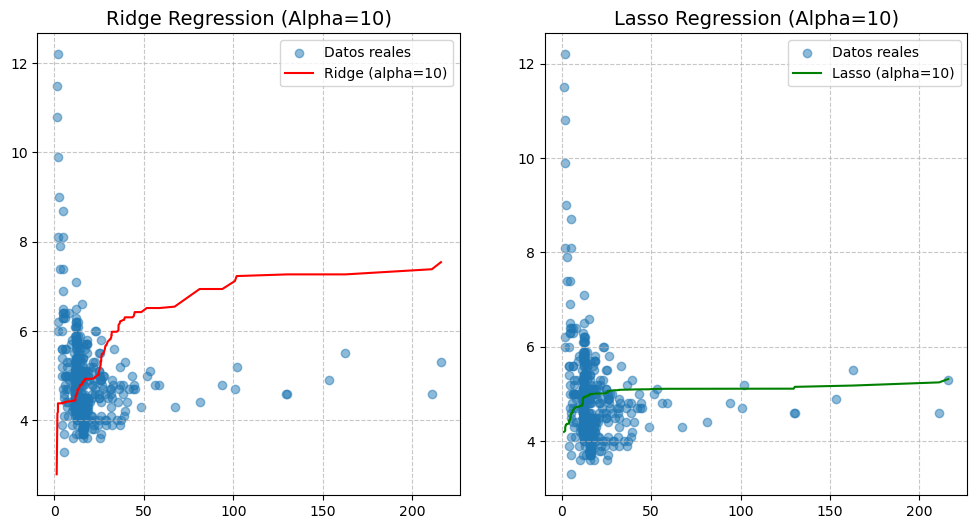

C:\Users\jorge\Anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.29503e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\jorge\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.695e+02, tolerance: 3.423e-02
  model = cd_fast.enet_coordinate_descent(


Alpha: 100
  Ridge MSE: 0.6563
  Lasso MSE: 0.9172


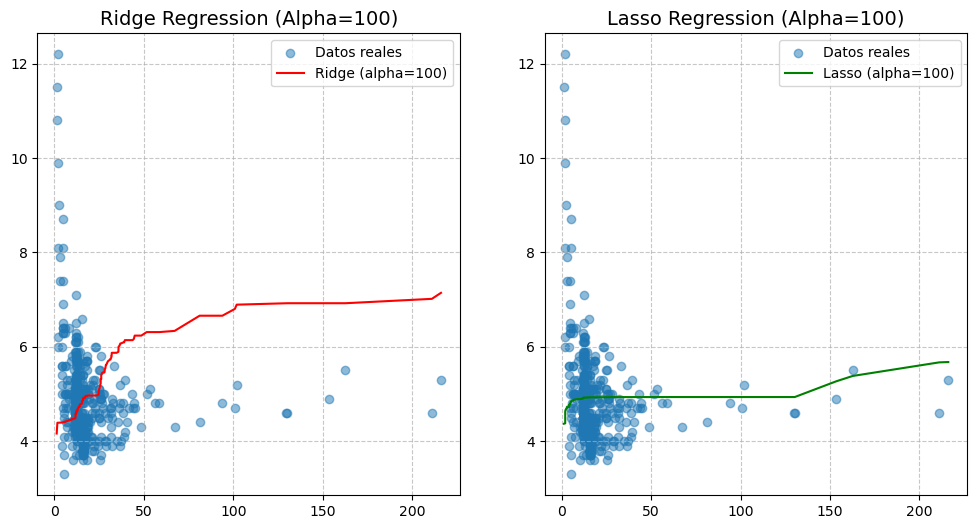

In [66]:
# Se crea una lista con los valores de penalizacion que se usaran en las regresiones ridge y lasso
alpha_values = [0.01, 0.1, 1, 10, 100]

# Se hace una transformacion polinomial de grado 6 y se separan las muestras de train y test
poly = PolynomialFeatures(degree=6)
x_poly = poly.fit_transform(x_real.reshape(-1, 1))
x_train, x_test, y_train, y_test = train_test_split(x_poly, y_real, test_size=0.2, random_state=42)

# Se itera sobre los valores de alpha
for alpha in alpha_values:
    # Se genera un modelo ridge usando el valor de penaliacion alpha correspondiente y se ajusta
    # Ridge penaliza la suma de los cuadrados de los coeficientes y reduce la complejidad del modelo
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_train, y_train)
    y_pred_ridge = ridge.predict(x_test)

    # Se genera un modelo de regresion lasso con un maximo de 10 mil iteraciones para asegurar convergencia
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(x_train, y_train)
    y_pred_lasso = lasso.predict(x_test)

    # Se Calcula el MSE para ambos modelos
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    mse_lasso = mean_squared_error(y_test, y_pred_lasso)
    
    # Se imprime el valor alpha y los MSE para ridge y lasso
    print(f"Alpha: {alpha}")
    print(f"  Ridge MSE: {mse_ridge:.4f}")
    print(f"  Lasso MSE: {mse_lasso:.4f}")

    # Tamaño para los gráficos
    plt.figure(figsize=(12, 6))

    # Se gráfica Ridge
    plt.subplot(1, 2, 1)
    plt.scatter(x_real, y_real, alpha=0.5, label='Datos reales')
    plt.plot(np.sort(x_real), np.sort(ridge.predict(x_poly)), label=f'Ridge (alpha={alpha})', color='red')
    plt.title(f'Ridge Regression (Alpha={alpha})', fontsize=14)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)

    # Se gráfica lasso
    plt.subplot(1, 2, 2)
    plt.scatter(x_real, y_real, alpha=0.5, label='Datos reales')
    plt.plot(np.sort(x_real), np.sort(lasso.predict(x_poly)), label=f'Lasso (alpha={alpha})', color='green')
    plt.title(f'Lasso Regression (Alpha={alpha})', fontsize=14)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.show()

las diferencias entre Ridge y Lasso es que Ridge afecta la magnitud de los coeficientes sin dejarlos exactamente en 0 (es decir deja los deja los coeficientes reducidos) y lasso fuerza a que algunos coeficientes queden exactamente en 0, lo que solo deja caracteristicas importantes. En los gráficos se visualiza que con Ridge se suavizan mas las curvas esto debido a que la penalización reduce los coeficientes de los términos polinomiales, con valores bajos del alpha ridge se ajusta bien por ende tiene un menor MSE, con valores mas altos aumenta el MSE y pierde flexibilidad.Lasso a medida que el alpha aumenta algunos coeficientes  e reducen a 0 quedando el modelo mas simple y para valores de alpha muy altos el modelo ya no es tan generalizable (ocurre un subajuste) y con valores de alpha bajos se ajusta bien a los datos.

Los resultados del MSE van mostrando como cambian las predicciones a medida se ajustan los modelos con ridge y lasso, los modelos con MSE mas altos tienden a regularizar demasiado por ende las predicciones se vuelven menos precisas.

Ridge seria la mejor opcion ya que minimiza el MSE ya que en todos los casos usando distintos valores de alpha este tiene un MSE menor, lo que indica que logra un mejor equilibrio entre ajuste y regularización para los datos.